In [54]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
import plotly.graph_objects as go

In [55]:
#Read in csv files
state_data = pd.read_csv('4.18states.csv')
county_data = pd.read_csv('abridged_couties.csv')
covid19_confirmed_US = pd.read_csv('time_series_covid19_confirmed_US.csv')
covid19_deaths_US = pd.read_csv('time_series_covid19_deaths_US.csv')

In [56]:
state_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


In [57]:
county_data.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [58]:
covid19_confirmed_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53


In [59]:
covid19_deaths_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,1,1,1,2,3


Looking at the above data, all tables provide interesting information. `state_data` provides essential metrics around COVID-19, such as the number of confirmed cases, the amount of deaths, and the testing rate for specific regions. `county_data` only provides information on US counties, but gives a lot of useful details on each counties that we can later use to create our prediction algorithm. For example, features around demographics (age and gender) and around the prevalence of certain serious diseases could prove explanatory and significant in predicting the number of cases and deaths from COVID-19. Finally, the last two tables provide useful information with regards to the development of the disease in each state. Incorporating early and late data could also improve our algorithm's accuracy. 

First, let's explore which states are the most affected by the pandemic, both in terms of confirmed cases and in terms of deaths. To do so, we filter the `state_data` table to contain only US states and relevant columns. We then sort these states by descending count of confirmed cases and deaths, and take the top 10. To visualise their relative importance, we finally plot a horizontal bar chart that displays both metrics. 

In [60]:
us_state_data = state_data[state_data['Country_Region'] == 'US']
us_confirmed = us_state_data.loc[:,['Province_State','Confirmed']]
us_confirmed_top_10 = us_confirmed.sort_values('Confirmed',ascending=False)[0:9]
us_deaths = us_state_data.loc[:,['Province_State','Deaths']]
us_deaths_top_10 = us_deaths.sort_values('Deaths',ascending=False)[0:9]

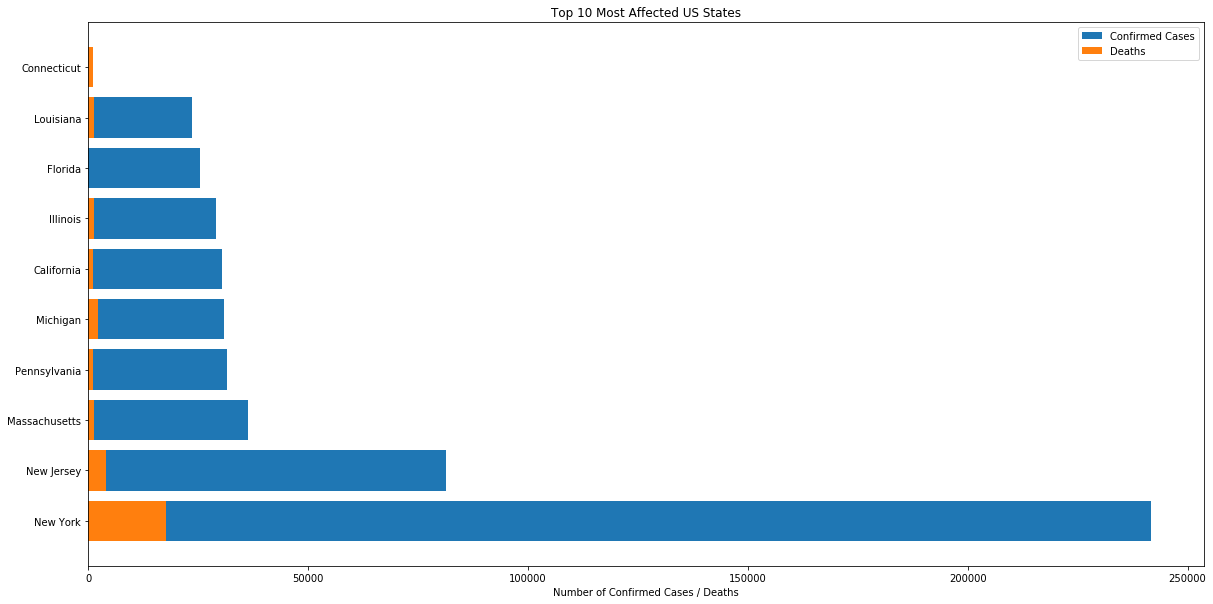

In [61]:
plt.figure(figsize=(20,10))
plt.barh(us_confirmed_top_10['Province_State'],us_confirmed_top_10['Confirmed'])
plt.barh(us_deaths_top_10['Province_State'],us_deaths_top_10['Deaths'])
plt.title('Top 10 Most Affected US States')
plt.xlabel('Number of Confirmed Cases / Deaths')
plt.legend(['Confirmed Cases','Deaths']);

It's important to note here that the data has only been updated on April 18th at latest, and hence these metrics are today much outdated. The number of both confirmed cases and deaths has sadly much increased since April 18. Nevertheless, we can see first hand with this bar-chart that some states are disproportionately more affected than others. The state of New York is the most affected, with nearly a quarter-million confirmed cases and a high number of deaths. However, states like Connecticut and those not shown on the plot have much smaller number of confirmed cases and deaths. Why were some states like New York and New Jersey disproportionately affected by the crisis? Hopefully, this project should shed some light on this question, by highlighting factors that contribute to high number of confirmed cases and deaths (such as previous conditions, demographics, policy changes, etc.). 

We can then explore in more details the `county_data` table and its features. The list of its features is extensive:

In [62]:
county_data.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

Going through the dataset's documentation, we learn that features such as '>50 gatherings' and 'restaurant dine-in' correspond to dates, given as a proleptic Gregorian ordinal. We can convert them to normal dates by using the date.fromordinal() function: 

In [63]:
print(date.fromordinal(737503))

2020-03-19


Although we will keep these column features in their proleptic Gregorian ordinal format for computational and plotting purposes, it is important to keep in mind that they correspond to dates. Plotting the correlation between some of these features provides interesting insights. We can for example plot the correlation between the dates when dining out was banned and the dates when entertainment and gyms were banned; we can also plot the correlation between the dates when gatherings of more than 50 were banned and the dates when gatherings of more than 500 were banned:

Text(0, 0.5, 'Date (proleptic Gregorian ordinal)')

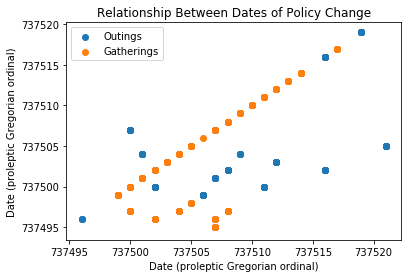

In [64]:
plt.scatter(county_data['entertainment/gym'],county_data['restaurant dine-in'])
plt.scatter(county_data['>50 gatherings'],county_data['>500 gatherings'])
plt.legend(['Outings','Gatherings'])
plt.title('Relationship Between Dates of Policy Change')
plt.xlabel('Date (proleptic Gregorian ordinal)')
plt.ylabel('Date (proleptic Gregorian ordinal)')

We can observe a clear correlation between outings bans and between gatherings bans. Intuitively, this makes sense since states will usually close restaurants the same time they will close down gyms; similarly, there should be a strong relationship between when states ban gatherings of more than 500 people and when they ban gatherings of more than 50 people. Although there is some overplotting in the above chart, which explains why a minority of counties are displayed (points overlap on top of eachother), this visualization provides a clear picture of how policy changes strongly follow each other in time. These can hence potentially be used as proxies in our algorithm. 

Step 2: Data Cleaning

Clean `state_data`

In [65]:
state_data.isnull().sum()

Province_State           0
Country_Region           0
Last_Update             83
Lat                      5
Long_                    5
Confirmed                0
Deaths                   0
Recovered               24
Active                   1
FIPS                    82
Incident_Rate            5
People_Tested           84
People_Hospitalized     91
Mortality_Rate           3
UID                      0
ISO3                     0
Testing_Rate            84
Hospitalization_Rate    91
dtype: int64

In [66]:
def clean_state(data):
    list_of_US_states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
                          "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
                          "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
                          "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
                          "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
                          "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
                          "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
                          "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

    data = data[data['Province_State'].isin(list_of_US_states)] 
    
    data = data.drop(['Recovered'], axis=1) #this column has quite a lot of NAN values
    
    data = data.drop(['Lat','Long_','Country_Region'], axis=1)
    
    #drop columns which contain rendundant information: People_Tested/Testing Rate, ISO3/US 
    data = data.drop(['Active','People_Tested','People_Hospitalized','ISO3'], axis=1)
    
    return data

state_cleaned = clean_state(state_data)

state_cleaned

,Province_State,Last_Update,Confirmed,Deaths,FIPS,Incident_Rate,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,Alabama,2020-04-18 22:32:47,4712,153,1.0,100.492717,3.247029,84000001,907.206961,13.157895
1,Alaska,2020-04-18 22:32:47,314,9,2.0,52.530410,2.866242,84000002,1615.226458,12.420382
3,Arizona,2020-04-18 22:32:47,4724,180,4.0,64.901548,3.810330,84000004,701.291175,11.981372
4,Arkansas,2020-04-18 22:32:47,1744,38,5.0,67.361213,2.178899,84000005,932.435235,16.685780
5,California,2020-04-18 22:32:47,30491,1140,6.0,77.766063,3.738808,84000006,641.731334,16.044079
6,Colorado,2020-04-18 22:32:47,9047,389,8.0,159.648818,4.299768,84000008,764.221442,19.398696
7,Connecticut,2020-04-18 22:32:47,17550,1086,9.0,492.246487,6.188034,84000009,1555.611091,11.088319
8,Delaware,2020-04-18 22:32:47,2538,67,10.0,260.638101,2.639874,84000010,1439.465825,8.825847
11,Florida,2020-04-18 22:32:47,25492,748,12.0,120.060628,2.934254,84000012,1161.077449,15.071395
12,Georgia,2020-04-18 22:32:47,17669,673,13.0,174.260925,3.808931,84000013,731.878131,19.355934


In [67]:
state_cleaned.isnull().sum()

Province_State          0
Last_Update             0
Confirmed               0
Deaths                  0
FIPS                    0
Incident_Rate           0
Mortality_Rate          0
UID                     0
Testing_Rate            0
Hospitalization_Rate    3
dtype: int64

In [68]:
state_cleaned[state_cleaned['Hospitalization_Rate'].isna()]

,Province_State,Last_Update,Confirmed,Deaths,FIPS,Incident_Rate,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
18,Indiana,2020-04-18 22:32:47,10641,545,18.0,162.607117,5.121699,84000018,869.086983,NaN
31,Nebraska,2020-04-18 22:32:47,1249,24,31.0,81.887034,1.921537,84000031,896.692524,NaN
32,Nevada,2020-04-18 22:32:47,3626,151,32.0,120.197686,4.164368,84000032,1019.359916,NaN


It makes sense to only keep rows corresponding to US states in `state_cleaned` because these rows seem to have a very small number of NAN values. After filtering out non-US states/locations, we see that the number of NAN values drops significantly. Overall, the reported data across US states is consistent. For example, the last update dates back 2020-04-18 for all rows, which is convenient if we want to go on to compare cases or death rates across states at the same point in time.

Clean `county_data`

In [69]:
county_na = county_data.isnull().sum()
county_na 

countyFIPS                              0
STATEFP                                23
COUNTYFP                               23
CountyName                              0
StateName                               0
State                                 169
lat                                   169
lon                                   169
POP_LATITUDE                           23
POP_LONGITUDE                          23
CensusRegionName                       98
CensusDivisionName                     98
Rural-UrbanContinuumCode2013           24
PopulationEstimate2018                 23
PopTotalMale2017                       23
PopTotalFemale2017                     23
FracMale2017                           23
PopulationEstimate65+2017              23
PopulationDensityperSqMile2010         19
CensusPopulation2010                   19
MedianAge2010                          19
#EligibleforMedicare2018               25
MedicareEnrollment,AgedTot2017         41
3-YrDiabetes2015-17               

In [70]:
def clean_county(data):
    
    #list of columns from the original dataset we are interested in keeping
    list_of_columns = ['countyFIPS','STATEFP','COUNTYFP','CountyName','StateName','POP_LATITUDE','POP_LONGITUDE', 
                       'MedianAge2010', 'FracMale2017', 'PopulationDensityperSqMile2010','MedicareEnrollment,AgedTot2017', 
                       '#Hospitals', '#ICU_beds', 'SVIPercentile', 'HeartDiseaseMortality','StrokeMortality', 
                       'RespMortalityRate2014','DiabetesPercentage', 'Smokers_Percentage', 'stay at home', '>50 gatherings',
                       '>500 gatherings','public schools', 'restaurant dine-in', 'entertainment/gym', 'federal guidelines', 
                       'foreign travel ban', 'dem_to_rep_ratio']
    
    data = data[list_of_columns]
    
    data = data[data['STATEFP'].notna()] #gets rid of rows where STATEFP is NAN
    
    return data

county_cleaned = clean_county(county_data)
county_cleaned

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,POP_LATITUDE,POP_LONGITUDE,MedianAge2010,FracMale2017,PopulationDensityperSqMile2010,...,Smokers_Percentage,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,dem_to_rep_ratio
0,01001,1.0,1.0,Autauga,AL,32.500389,-86.494165,37.0,0.486578,91.8,...,18.081557,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.326656
1,01003,1.0,3.0,Baldwin,AL,30.548923,-87.762381,41.1,0.485472,114.7,...,17.489033,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.253255
2,01005,1.0,5.0,Barbour,AL,31.844036,-85.310038,39.0,0.527701,31.0,...,21.999985,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.893106
3,01007,1.0,7.0,Bibb,AL,33.030921,-87.127659,37.8,0.535469,36.8,...,19.114200,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.278124
4,01009,1.0,9.0,Blount,AL,33.955243,-86.591491,39.0,0.493114,88.9,...,19.208672,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.094317
5,01011,1.0,11.0,Bullock,AL,32.116327,-85.701192,38.5,0.544670,17.5,...,22.894664,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,3.096491
6,01013,1.0,13.0,Butler,AL,31.773539,-86.653550,40.1,0.465675,27.0,...,21.765335,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.760253
7,01015,1.0,15.0,Calhoun,AL,33.725460,-85.819442,38.2,0.480693,195.7,...,20.612560,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.402921
8,01017,1.0,17.0,Chambers,AL,32.860439,-85.266474,41.5,0.478747,57.4,...,19.392927,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.737473
9,01019,1.0,19.0,Cherokee,AL,34.179333,-85.629194,43.9,0.496809,46.9,...,17.498674,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.172791


We decided to filter out some columns from the `county_data` dataframe, and essentially keep those we believe could help us predict the number of cases or deaths in the US. Public schools, restaurants dine-in, federal guidelines, and foreign travel ban have relatively few NAN values, so they could potentially be good predictors.

list_of_columns contains some other selected features, as well as some unique identifiers like STATEFP for instance, which we will need to merge `state_cleaned` and `county_cleaned` into one dataframe. Therefore, the rows where STATEFP had a NAN value were removed from our dataframe. Doing so also helps us get rid of NAN values in some other columns as well, as it can be seen in `county_cleaned_na` below.

In [71]:
county_cleaned_na = county_cleaned.isnull().sum()
county_cleaned_na

countyFIPS                          0
STATEFP                             0
COUNTYFP                            0
CountyName                          0
StateName                           0
POP_LATITUDE                        0
POP_LONGITUDE                       0
MedianAge2010                       1
FracMale2017                        2
PopulationDensityperSqMile2010      1
MedicareEnrollment,AgedTot2017     23
#Hospitals                         80
#ICU_beds                          80
SVIPercentile                      81
HeartDiseaseMortality              21
StrokeMortality                    13
RespMortalityRate2014              80
DiabetesPercentage                  3
Smokers_Percentage                 80
stay at home                      569
>50 gatherings                    198
>500 gatherings                   198
public schools                      2
restaurant dine-in                  2
entertainment/gym                  67
federal guidelines                  2
foreign trav

Merge `state_cleaned` and `county_cleaned` into one main dataframe

In [72]:
def merge_county_state(county_cleaned,state_cleaned):
    data = county_cleaned.merge(state_cleaned, how="inner",left_on='STATEFP', right_on='FIPS')
    
    #change index of dataframe, from 0 to length of new dataframe
    data.reset_index(drop=True)
    
    #Since every row in county_state_merged represents a county, we changed the names of columns such 
    #as Deaths or Confirmed to Deaths_State and Confirmed_State, to reflect that these values are aggregates for the entire 
    #state (and not the particular county!)
    data = data.rename(columns={'CountyName':'County','Province_State':'State','Confirmed':'Confirmed_State','Deaths':'Deaths_State',
                                'Incident_Rate':'Incident_Rate_State','Mortality_Rate':'Mortality_Rate_State',
                                'Testing_Rate':'Testing_Rate_State','Hospitalization_Rate':'Hospitalization_Rate_State'})
    
    data = data.drop(['StateName'],axis=1) #'State' column already exists
    return data

county_state_merged = merge_county_state(county_cleaned,state_cleaned)
#county_state_merged

In [73]:
county_cleaned['STATEFP'].isin(state_cleaned['FIPS']).value_counts()

True     3142
False      79
Name: STATEFP, dtype: int64

We use an inner merge so that only common values between the left and right dataframes are retained. Hence, `county_state_merged` has 3142 rows, whereas `county_cleaned` has 3221.This particular kind of merge helps reduce the number of NAN values in our final output.

In [74]:
county_state_merged[county_state_merged['County']=='Baldwin']

,countyFIPS,STATEFP,COUNTYFP,County,POP_LATITUDE,POP_LONGITUDE,MedianAge2010,FracMale2017,PopulationDensityperSqMile2010,"MedicareEnrollment,AgedTot2017",...,State,Last_Update,Confirmed_State,Deaths_State,FIPS,Incident_Rate_State,Mortality_Rate_State,UID,Testing_Rate_State,Hospitalization_Rate_State
1,01003,1.0,3.0,Baldwin,30.548923,-87.762381,41.1,0.485472,114.7,41590.0,...,Alabama,2020-04-18 22:32:47,4712,153,1.0,100.492717,3.247029,84000001,907.206961,13.157895
390,13009,13.0,9.0,Baldwin,33.084849,-83.245659,34.1,0.506458,177.3,6421.0,...,Georgia,2020-04-18 22:32:47,17669,673,13.0,174.260925,3.808931,84000013,731.878131,19.355934


In [75]:
#county_state_merged.isnull().sum()

Clean covid19_deaths_US

In [76]:
covid19_deaths_US

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,1,1,1,1,1,1,1,1,2,3
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1,1,1,1,1,1,1,1,2,2
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,1,1,1,1,1,2,2,2,2,2
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,0,0,0,0,0,0,0,0,0,0
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,0,0,0,0,0,0,0,0,0,0
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,0,0,0,0,0,0,0,0,0,0


In [77]:
def clean_covid19_deaths_US(data):
    
    #remove redundant columns which we don't necessarily need
    data = data.drop(['iso2','iso3','code3','Country_Region','Lat','Long_','Combined_Key'],axis=1)
    data = data.rename(columns={'Admin2':'County','Province_State':'State'})
    
    data = data.reset_index(drop=True)
    
    #The UID column is also present in county_state_merged, so we could use it if we wanted to merge the two tables.
    #It looks like valid UID codes for counties start with 840. Let's remove the rows with invalid UIDs.
    data = data[data['UID'].astype(str).str.startswith('840')==True]
    
    #filter out rows where county is 'Unassigned', NAN, '
    data = data[(data['County'] != 'Unassigned') & (data['County'].notna())]
    
    #Remove all rows where County is 'Out of ...' (ex: Out of NJ). Basically anything other than an explicit county name.
    data = data.drop(list(range(3144,3200)))
    data = data.drop([3253,3254]) #row where county name is 'Federal Correctional Institution'?. Remove these rows.
    
    return data

covid19_deaths_US_cleaned = clean_covid19_deaths_US(covid19_deaths_US)
#covid19_deaths_US_cleaned

In [78]:
#rename FIPS in covid19_deaths_US_cleaned to 'countyFIPS'
covid19_deaths_US_cleaned = covid19_deaths_US_cleaned.rename(columns={'FIPS':'countyFIPS'}) 

#converts countyFIPS in both tables to ints
covid19_deaths_US_cleaned['countyFIPS'] = covid19_deaths_US_cleaned['countyFIPS'].astype(int)
county_state_merged['countyFIPS'] = county_state_merged['countyFIPS'].astype(int)

print(type(covid19_deaths_US_cleaned['countyFIPS'][5])) #is an int
print(type(county_state_merged['countyFIPS'][5])) #also an int

<class 'numpy.int64'>
<class 'numpy.int64'>


In [79]:
#create a dataframe with countyFIPS, Population and column of interest
total_deaths_per_county = covid19_deaths_US_cleaned[['countyFIPS','Population','4/18/20']]
#rename'4/18/20' to 'DeathsCounty(4/18/20)'
total_deaths_per_county = total_deaths_per_county.rename(columns={'4/18/20':'DeathsCounty(4/18/20)'})

In [80]:
#We use countyFIPS to perform our merge, since this code should be unique to each county.
#It's important to note some counties have the same name but are located in different states!

data = county_state_merged.merge(total_deaths_per_county, how='inner', on='countyFIPS')
data = data.reset_index(drop=True)

In [81]:
data.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'County', 'POP_LATITUDE',
       'POP_LONGITUDE', 'MedianAge2010', 'FracMale2017',
       'PopulationDensityperSqMile2010', 'MedicareEnrollment,AgedTot2017',
       '#Hospitals', '#ICU_beds', 'SVIPercentile', 'HeartDiseaseMortality',
       'StrokeMortality', 'RespMortalityRate2014', 'DiabetesPercentage',
       'Smokers_Percentage', 'stay at home', '>50 gatherings',
       '>500 gatherings', 'public schools', 'restaurant dine-in',
       'entertainment/gym', 'federal guidelines', 'foreign travel ban',
       'dem_to_rep_ratio', 'State', 'Last_Update', 'Confirmed_State',
       'Deaths_State', 'FIPS', 'Incident_Rate_State', 'Mortality_Rate_State',
       'UID', 'Testing_Rate_State', 'Hospitalization_Rate_State', 'Population',
       'DeathsCounty(4/18/20)'],
      dtype='object')

In [82]:
redundant_columns = ['countyFIPS','STATEFP','COUNTYFP','County','State','Last_Update',
               'UID','FIPS',] #drop columns which we don't need for our prediction
data = data.drop(redundant_columns, axis=1)
#data

Step 3: Prediction method and feature engineering

In the following code, we split `data` into two separate dataframes:

(1) Target values `Y`: this consists of the cumulative number of deaths from COVID-19 in a given county up to 4/18/2020. 

(2) Set of features `X_features`: this is a data frame where each row is a feacture vector consisting of the features selected in step 2 above. We remove all categorical variables and primary/secondary keys and only keep quantitative variables that can help us predict Y. 

In [83]:
Y = data['DeathsCounty(4/18/20)']
X_features = data.drop('DeathsCounty(4/18/20)', axis=1)

In [84]:
X_features.columns

Index(['POP_LATITUDE', 'POP_LONGITUDE', 'MedianAge2010', 'FracMale2017',
       'PopulationDensityperSqMile2010', 'MedicareEnrollment,AgedTot2017',
       '#Hospitals', '#ICU_beds', 'SVIPercentile', 'HeartDiseaseMortality',
       'StrokeMortality', 'RespMortalityRate2014', 'DiabetesPercentage',
       'Smokers_Percentage', 'stay at home', '>50 gatherings',
       '>500 gatherings', 'public schools', 'restaurant dine-in',
       'entertainment/gym', 'federal guidelines', 'foreign travel ban',
       'dem_to_rep_ratio', 'Confirmed_State', 'Deaths_State',
       'Incident_Rate_State', 'Mortality_Rate_State', 'Testing_Rate_State',
       'Hospitalization_Rate_State', 'Population'],
      dtype='object')

We then normalize X_features and remove all null values (replacing them by 0):

In [85]:
def normalize(data):
    '''
    Args:
        data : a dataframe
    Returns:
        the normalized version of input data with NAN values filled with 0's
    '''
    return ((data-np.mean(data))/np.std(data)).fillna(0)

X_features = normalize(X_features)

We split between training set and test set and hold out the test set for later

In [86]:
np.random.seed(50)
X_train, X_test = train_test_split(X_features, test_size=0.1,random_state=np.random.seed(50))
Y_train, Y_test = train_test_split(Y, test_size=0.1,random_state=np.random.seed(50))
train = X_train
train['Y'] = Y_train

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



We then split our train set between validation and training, so that we can improve our model based on the validation set's accuracy.

In [87]:
train, val = train_test_split(train, test_size=0.1, random_state=50)

X_train, Y_train = train.iloc[:,:-1], train['Y']
X_val, Y_val = val.iloc[:,:-1], val['Y']

We fit the model on the training set and find the predictions on the training and validation set. 

In [88]:
linear_model = lm.LinearRegression()

linear_model.fit(X_train, Y_train)

y_train_predicted = linear_model.predict(X_train)
y_val_predicted = linear_model.predict(X_val)
y_test_predicted = linear_model.predict(X_test)

linear_model.coef_

array([-1.70486137e+00, -5.29350144e+00,  2.40768274e+01, -6.17521262e+00,
        1.17354166e+02, -4.10387200e+02, -5.77888951e+01,  2.12951487e+01,
        7.92588922e+00, -6.52123488e+00, -5.53365455e+00, -1.05750930e+00,
       -5.11935383e+00,  4.86729415e+00,  2.49104039e+00, -6.47081268e+00,
        8.80836776e+00, -9.24506329e-01, -9.68753054e+00,  9.71026325e+00,
        0.00000000e+00,  4.83169060e-13, -2.14764014e+01,  5.48726963e+01,
       -7.15870321e+01,  1.82436682e+01,  1.02264819e+01,  7.79320421e+00,
       -2.55681191e+00,  4.76811240e+02])

Finally we create a function to compute the root-mean-squarred-error, which we can then use to evaluate the accuracy of our model. 

In [89]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    return np.mean((actual-predicted)**2)**0.5

In [90]:
training_error_1 = rmse(Y_train,y_train_predicted)
val_error_1 = rmse(Y_val,y_val_predicted)
test_error_1 = rmse(Y_test,y_test_predicted)
print("Training Error 1: ", training_error_1)
print("Validation Error 1: ", val_error_1)
#print("Test Error: ", test_error)

Training Error 1:  131.55892218579632
Validation Error 1:  92.30469898000301


Now let's dive into feature engineering.

To make our model more sophisticated, we can do some feature engineering and come up with interesting new variables to add to our `data` dataframe.

For example, we can create a binary variable that indicates if the county is in the West or the East of the US! We saw that Eastern states were somewhat more affected by the virus, so having this binary variable could embetter our model as well as simplify it (we won't need to add specific longitude and lattitude). To do this, we assign 0 to states to the west of the 100th Meridian West and 1 to states to the east of that same longitude, at -100: 

In [91]:
def eastern_state(longitude):
    if longitude < -100:
        return 0
    else: 
        return 1
    
data['East_Coast'] = data['POP_LONGITUDE'].apply(eastern_state)
#data

We can also create averages for sickness prevalence and for policy changes and add them to our dataframe:

In [92]:
data['Avg_Sickness_Mortality'] = data[['RespMortalityRate2014','HeartDiseaseMortality']].mean(axis=1)
data['Avg_Date_Ban'] = data[['stay at home', '>50 gatherings', '>500 gatherings','public schools', 
                             'restaurant dine-in', 'entertainment/gym']].mean(axis=1)

#we move our Y variable back to the last column of our dataframe
deaths = data.pop('DeathsCounty(4/18/20)')
data['DeathsCounty(4/18/20)'] = deaths

We can then make a heatmap to show correlations between our response variable, 'DeathsCounty(4/18/20)', and some of the features in our data table. It should help us determine which features to keep, and which to discard from our features matrix.

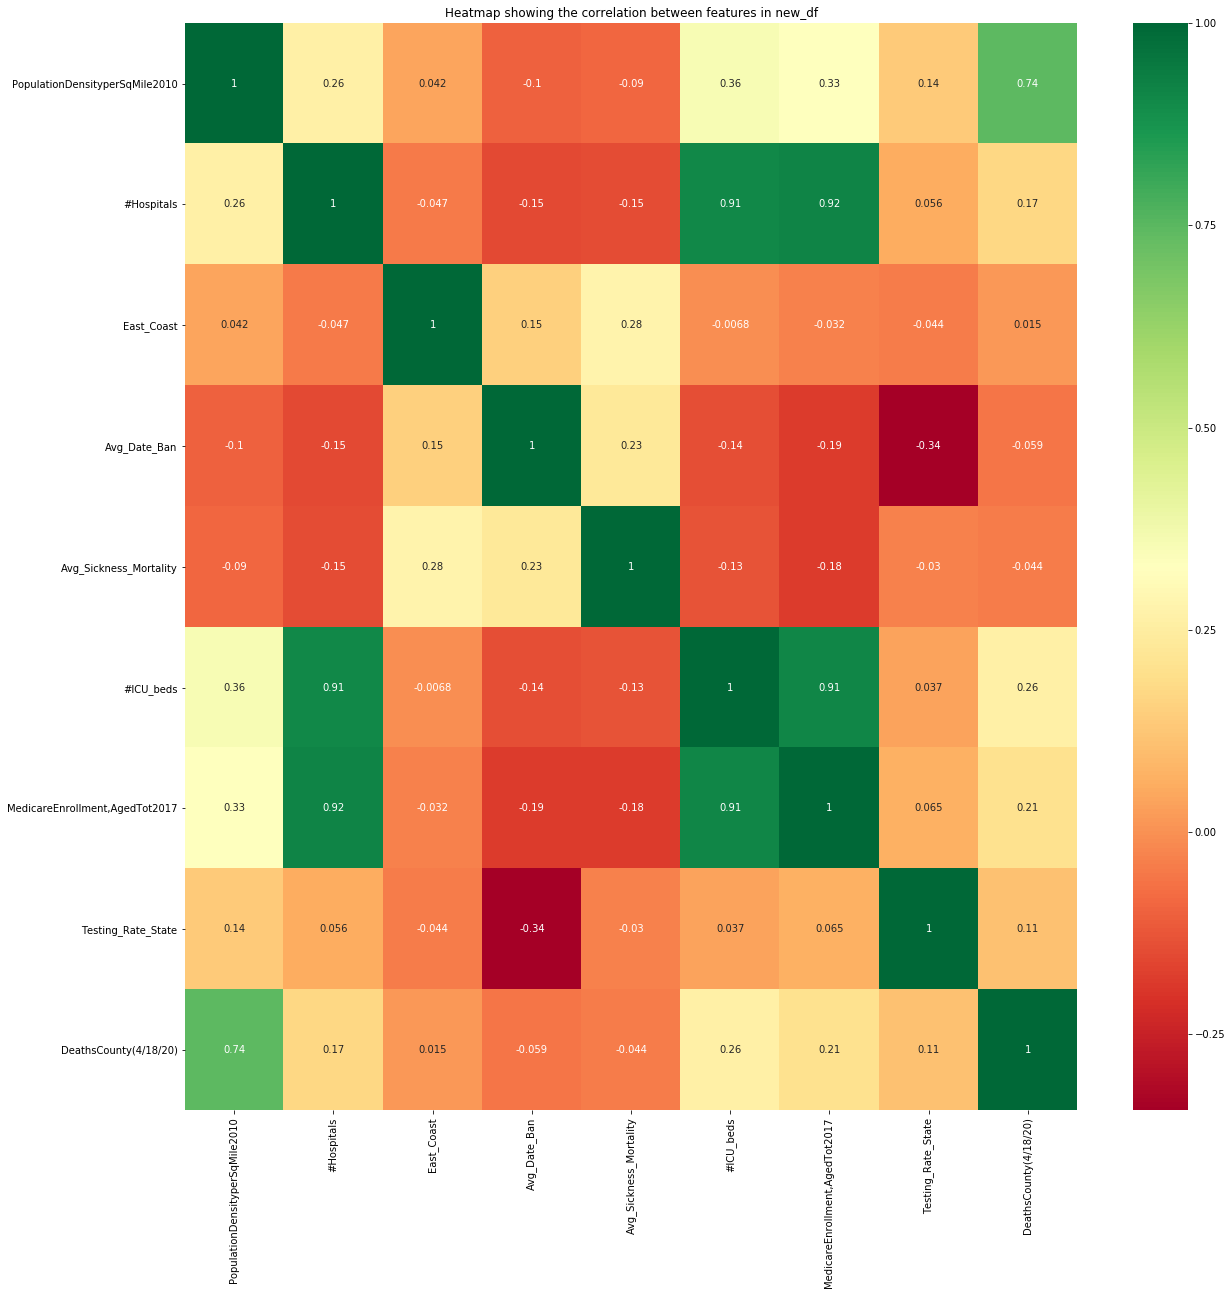

In [93]:
#select a few features and the column with the total number of deaths per county as of 4/18/2020
some_features = data[['PopulationDensityperSqMile2010','#Hospitals','East_Coast','Avg_Date_Ban', 
                      'Avg_Sickness_Mortality','#ICU_beds','MedicareEnrollment,AgedTot2017','Testing_Rate_State',
                      'DeathsCounty(4/18/20)']] 

corr = some_features.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))

#plot heat map

sns.heatmap(some_features[top_corr_features].corr(), annot=True,cmap="RdYlGn")
plt.title('Heatmap showing the correlation between features in new_df');

In [94]:
# X_features_updated == 'list of features we are keeping for our new matrix'

X_features_updated = data.drop(['DeathsCounty(4/18/20)','POP_LATITUDE','POP_LONGITUDE','#Hospitals',
                                'HeartDiseaseMortality','StrokeMortality','stay at home', '>50 gatherings',
                                '>500 gatherings', 'public schools', 'restaurant dine-in','entertainment/gym',
                                'foreign travel ban', 'federal guidelines','RespMortalityRate2014'], axis=1)
X_features_updated = normalize(X_features_updated)

In [95]:
X_features_updated.columns

Index(['MedianAge2010', 'FracMale2017', 'PopulationDensityperSqMile2010',
       'MedicareEnrollment,AgedTot2017', '#ICU_beds', 'SVIPercentile',
       'DiabetesPercentage', 'Smokers_Percentage', 'dem_to_rep_ratio',
       'Confirmed_State', 'Deaths_State', 'Incident_Rate_State',
       'Mortality_Rate_State', 'Testing_Rate_State',
       'Hospitalization_Rate_State', 'Population', 'East_Coast',
       'Avg_Sickness_Mortality', 'Avg_Date_Ban'],
      dtype='object')

We fit a new model using this updated features matrix, and make new predictions.

In [96]:
np.random.seed(37)
X_train, X_test = train_test_split(X_features_updated, test_size=0.1,random_state=np.random.seed(37))
Y_train, Y_test = train_test_split(Y, test_size=0.1,random_state=np.random.seed(37))
train = X_train
train['Y'] = Y_train

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [97]:
train, val = train_test_split(train, test_size=0.1, random_state=37)

X_train, Y_train = train.iloc[:,:-1], train['Y']
X_val, Y_val = val.iloc[:,:-1], val['Y']

In [98]:
linear_model = lm.LinearRegression()

linear_model.fit(X_train, Y_train)

y_train_predicted = linear_model.predict(X_train)
y_val_predicted = linear_model.predict(X_val)
y_test_predicted = linear_model.predict(X_test)

linear_model.coef_

array([  26.20576818,   -6.89069883,  110.18968214, -454.59031461,
          8.95557096,    3.62351513,   -4.96651394,   11.01397064,
        -26.02078705,   60.11494523,  -79.93119154,   29.39895936,
          6.55908747,    4.48309284,    1.81519794,  482.24906454,
         -4.50744845,   -8.0253201 ,    2.19525294])

Finally we compute the accuracy of our new model:

In [99]:
training_error_2 = rmse(Y_train,y_train_predicted)
val_error_2 = rmse(Y_val,y_val_predicted)
test_error_2 = rmse(Y_test,y_test_predicted)
print("Training Error 2: ", training_error_2)
print("Validation Error 2: ", val_error_2)
#print("Test Error: ", test_error)

Training Error 2:  139.82648560626055
Validation Error 2:  74.67405465161474


We can see we have significantly lowered our validation error. This can probably be explained by the fact that we have made our model less complex, so that it generalizes better to unseen data. 

Step 4: Use test data for model evaluation

Let's visualize the error of our linear regression model by plotting the residual.

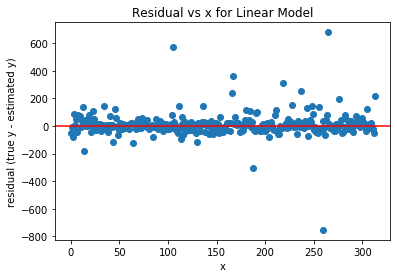

<Figure size 1440x1440 with 0 Axes>

In [100]:
plt.scatter(np.arange(len(X_test)), Y_test-y_test_predicted)
plt.xlabel('x')
plt.ylabel('residual (true y - estimated y)')
plt.title('Residual vs x for Linear Model')
plt.axhline(y = 0, color='r')
plt.figure(figsize=(20,20));

We can also compare the training, validation, and test RMSE for our two linears models:

In [101]:
training_rmse = [training_error_1, training_error_2]
validation_rmse = [val_error_1, val_error_2]
test_rmse = [test_error_1, test_error_2]
names = ['Model 1','Model 2']
fig = go.Figure([
    go.Bar(x = names, y = training_rmse, name="Training RMSE"),
    go.Bar(x = names, y = validation_rmse, name="Validation RMSE"),
    go.Bar(x = names, y = test_rmse, name="Test RMSE", opacity=.3)])
fig.update_layout(xaxis_title="Models",yaxis_title="RMSE")